In [270]:
import numpy as np
from scipy.optimize import check_grad
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Set mean (mu) as a zero vector
mu = np.zeros(2)
# Set covariance matrix
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])

# Generate random vectors
num_samples = 4  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [310]:
def function(edge_m,point):
    alpha = 5
    connection = Y[edge_m][0]
    point_1 = point[Y[edge_m][1]]
    point_2 = point[Y[edge_m][2]]
    norm_distance_squared = np.linalg.norm(point_1 - point_2) ** 2
    exponent = -connection * (alpha - norm_distance_squared)
    sigmoid_value = 1 / (1 + np.exp(exponent))
    result = np.log(sigmoid_value)
    return result

In [311]:
def grad(edge_m, index_i):
    alpha = 5
    connection = Y[edge_m][0]
    node1_coord = point[Y[edge_m][1]]
    node2_coord = point[Y[edge_m][2]]
    distance = (np.linalg.norm(node1_coord - node2_coord))**2
    
    numerator = -2 * connection * (node1_coord[index_i] - node2_coord[index_i]) * np.exp(-connection * (alpha - distance))
    denominator = 1 + np.exp(-connection * (alpha - distance))
    
    return numerator / denominator

In [289]:
# Function af x
sum = 0
for m in range(len(Y)):
    sum += function(m,points)
sum

-32.608388461327536

In [290]:
# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[1][0] += 0.001
sum_e = 0
for m in range(len(Y)):
    sum_e += function(m,point_e)
sum_e

-32.608711837442925

In [291]:
# Gradient af x
gradient = 0
for m in range(len(Y)):
    if ((Y[m][1] == 1) or (Y[m][2] == 1)):
        gradient += grad(m,0)

gradient

-1.8932832505483042

In [293]:
(sum_e-sum)/0.001-(gradient)

1.569907135158953

In [308]:
hist = np.zeros(100000)
for n in range(100000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    
    sum = 0
    for m in range(len(Y)):
        sum += function(m,points)

    point_e = copy.deepcopy(points)
    point_e[1][0] += 0.001
    sum_e = 0
    for m in range(len(Y)):
        sum_e += function(m,point_e)
    
    gradient = 0
    for m in range(len(Y)):
        if ((Y[m][1] == 1) or (Y[m][2] == 1)):
            gradient += grad(m,0)
            
    hist[n] = (sum_e-sum)/0.001-(gradient)

(array([1.0000e+00, 9.0000e+00, 9.0000e+00, 3.8000e+01, 8.6000e+01,
        1.9200e+02, 3.7400e+02, 7.1100e+02, 1.4720e+03, 2.5780e+03,
        4.0340e+03, 6.2440e+03, 8.7550e+03, 1.0520e+04, 1.2895e+04,
        1.4705e+04, 1.0851e+04, 9.1250e+03, 6.8860e+03, 4.3160e+03,
        2.7990e+03, 1.6660e+03, 8.0800e+02, 4.4200e+02, 2.5900e+02,
        1.3200e+02, 5.6000e+01, 2.2000e+01, 1.3000e+01, 2.0000e+00]),
 array([-10.25888143,  -9.45434917,  -8.64981691,  -7.84528466,
         -7.0407524 ,  -6.23622015,  -5.43168789,  -4.62715563,
         -3.82262338,  -3.01809112,  -2.21355887,  -1.40902661,
         -0.60449435,   0.2000379 ,   1.00457016,   1.80910241,
          2.61363467,   3.41816693,   4.22269918,   5.02723144,
          5.83176369,   6.63629595,   7.44082821,   8.24536046,
          9.04989272,   9.85442497,  10.65895723,  11.46348949,
         12.26802174,  13.072554  ,  13.87708625]),
 <BarContainer object of 30 artists>)

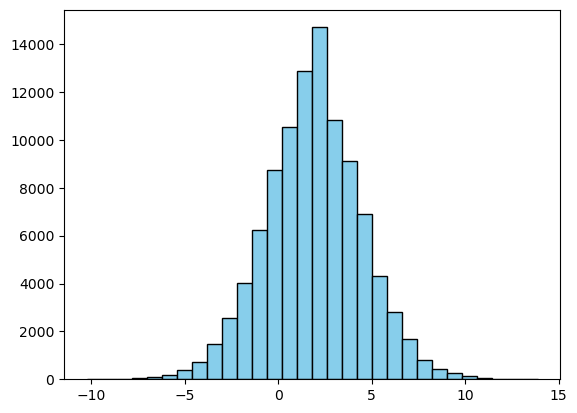

In [309]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')